In [1]:
from keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


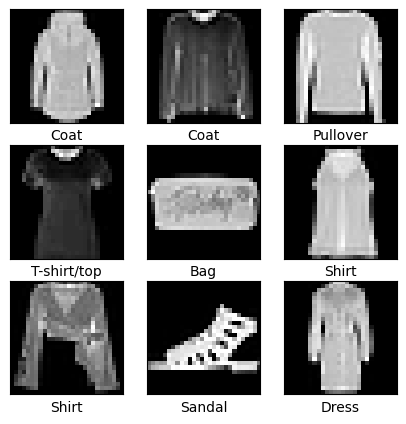

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])
plt.show()

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
from tensorflow.keras.utils import to_categorical
# 실제 정답 비교를 위해 0 ~ 9 정답지를 따로 저장
real_y_test = y_test

# 레이블 데이터를 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# 3) 훈련 / 검증 데이터를 70:30 비율로 분리
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)
x_train.shape

(42000, 28, 28)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape=(28,28))) # Flatten(28,28) -> (28*28) -> 1차원 784로 변환
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [19]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [20]:
first_history = first_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
  9/329 [..............................] - ETA: 2s - loss: 1.8879 - acc: 0.3750 

2024-05-08 00:20:00.933335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - ETA: 0s - loss: 0.6504 - acc: 0.7757

2024-05-08 00:20:02.875215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 3s 7ms/step - loss: 0.6504 - acc: 0.7757 - val_loss: 0.4866 - val_acc: 0.8352
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4740 - acc: 0.8359 - val_loss: 0.4500 - val_acc: 0.8482
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4505 - acc: 0.8433 - val_loss: 0.4510 - val_acc: 0.8449
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4407 - acc: 0.8469 - val_loss: 0.4341 - val_acc: 0.8531
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4212 - acc: 0.8530 - val_loss: 0.4259 - val_acc: 0.8552
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4211 - acc: 0.8537 - val_loss: 0.4298 - val_acc: 0.8529
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4135 - acc: 0.8559 - val_loss: 0.4306 - val_acc: 0.8504
Epoch 8/10
329/329 [==============================] - 2s 7ms/step - loss: 0.4155 - acc:

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

second_model = Sequential()
second_model.add(Flatten(input_shape=(28,28))) # Flatten(28,28) -> (28*28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu')) # 층 하나 추가
second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax'))

second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

second_history = second_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
 18/329 [>.............................] - ETA: 1s - loss: 1.9467 - acc: 0.3290

2024-05-08 00:20:24.869360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


327/329 [============================>.] - ETA: 0s - loss: 0.7333 - acc: 0.7476

2024-05-08 00:20:26.756706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 3s 7ms/step - loss: 0.7326 - acc: 0.7478 - val_loss: 0.5514 - val_acc: 0.8047
Epoch 2/10
329/329 [==============================] - 2s 7ms/step - loss: 0.5735 - acc: 0.8067 - val_loss: 0.5557 - val_acc: 0.8135
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.6545 - acc: 0.7955 - val_loss: 0.8046 - val_acc: 0.7943
Epoch 4/10
329/329 [==============================] - 2s 7ms/step - loss: 1.0066 - acc: 0.7600 - val_loss: 2.0102 - val_acc: 0.7167
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 2.5779 - acc: 0.7029 - val_loss: 2.7315 - val_acc: 0.7094
Epoch 6/10
329/329 [==============================] - 2s 7ms/step - loss: 5.5589 - acc: 0.6739 - val_loss: 5.9022 - val_acc: 0.6663
Epoch 7/10
329/329 [==============================] - 2s 7ms/step - loss: 11.4468 - acc: 0.6286 - val_loss: 11.9069 - val_acc: 0.6532
Epoch 8/10
329/329 [==============================] - 2s 7ms/step - loss: 20.6559 - a

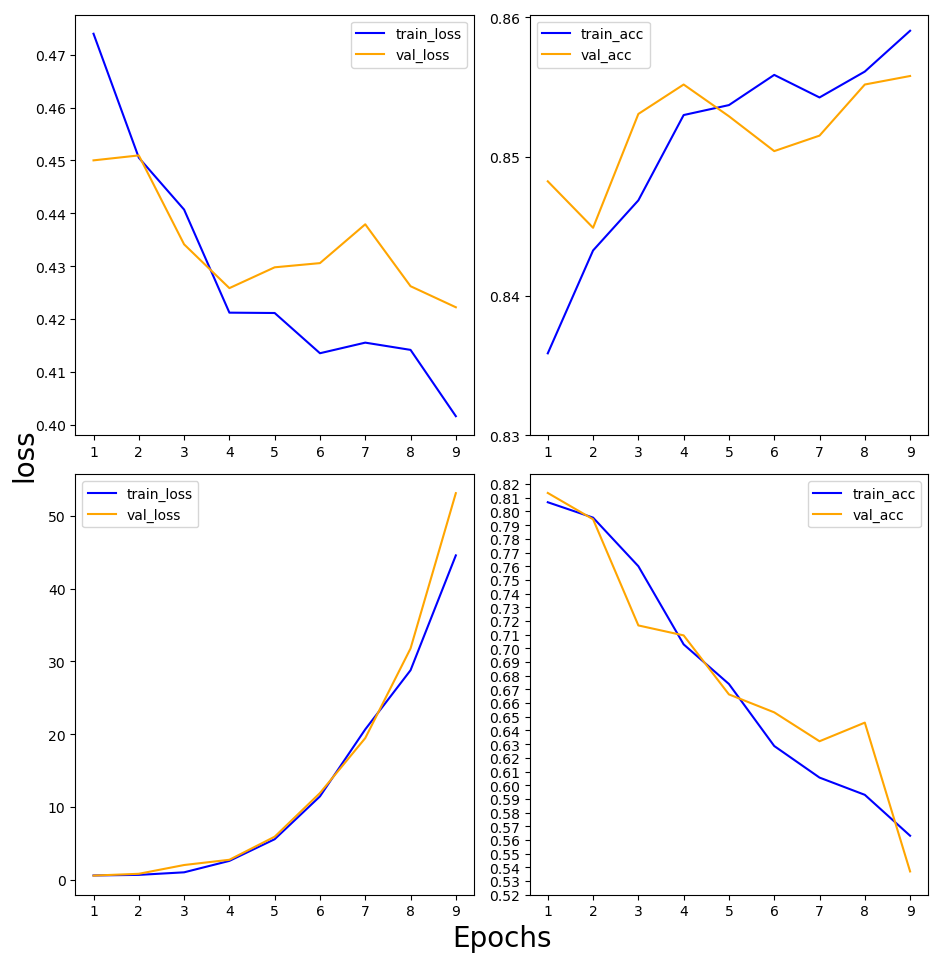

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 10)

In [14]:
first_model.evaluate(x_test, y_test)
second_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 561.6147 - acc: 0.4397


[561.61474609375, 0.43970000743865967]

313/313 [==============================] - 0s 1ms/step


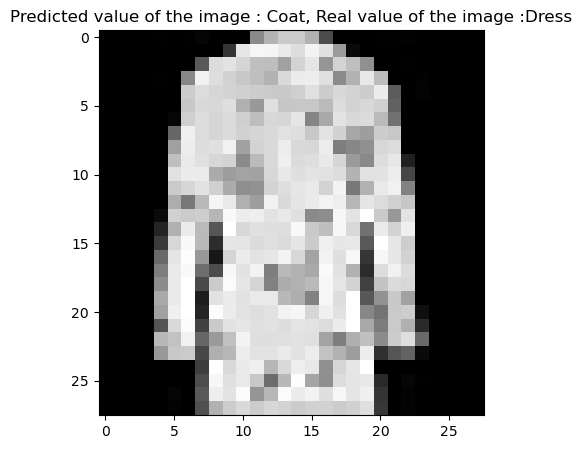

In [33]:
import numpy as np

results = first_model.predict(x_test)
arg_results = np.argmax(results, axis = -1)

random_idx = np.random.randint(10000)

plt.figure(figsize=(5,5))

plt.imshow(x_test[random_idx], cmap='gray')
plt.title('Predicted value of the image : ' + class_names[arg_results[random_idx]] + ', Real value of the image :' + class_names[real_y_test[random_idx]])
plt.show()

313/313 [==============================] - 0s 1ms/step


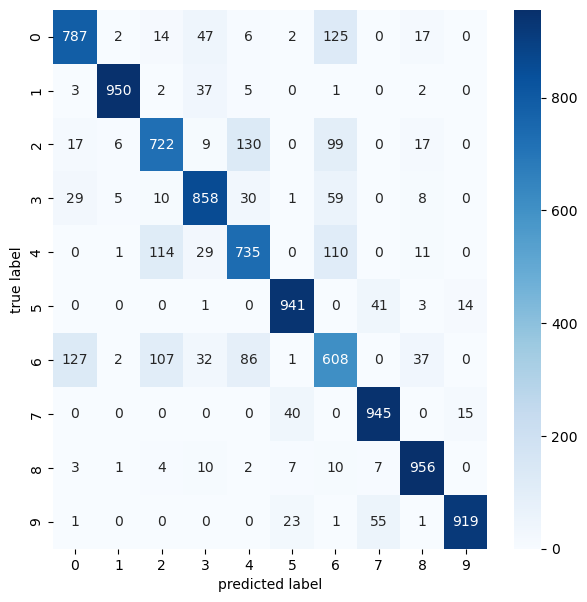

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
results = first_model.predict(x_test)

plt.figure(figsize=(7,7))

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)) # 실제 정답과 비교
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()